In [2]:
# data: banknotes.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [10]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [12]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

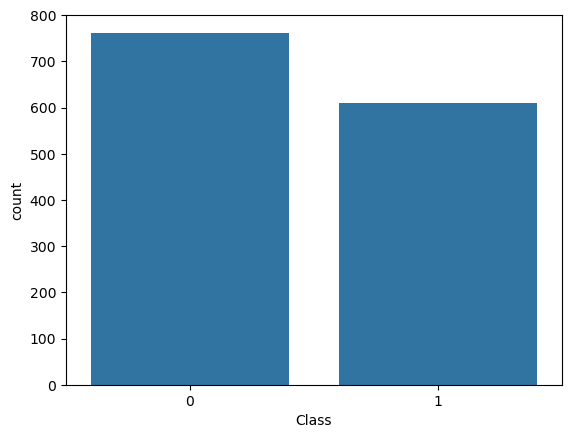

In [16]:
sns.countplot(x = y);

#### cross validation

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0)

#### Build the model

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state= 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Evaluate

In [25]:
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

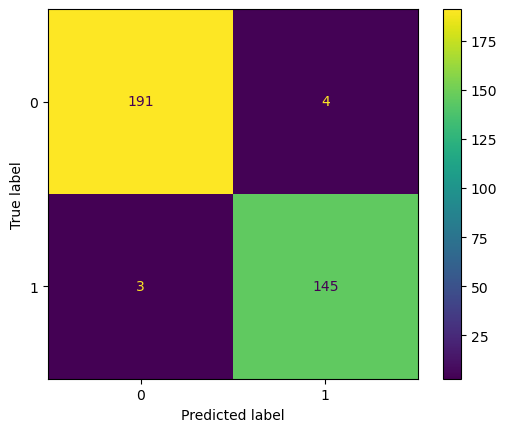

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [33]:
accuracy_score(y_test, y_pred)

0.9795918367346939

#### visualize the tree

In [36]:
from sklearn.tree import plot_tree

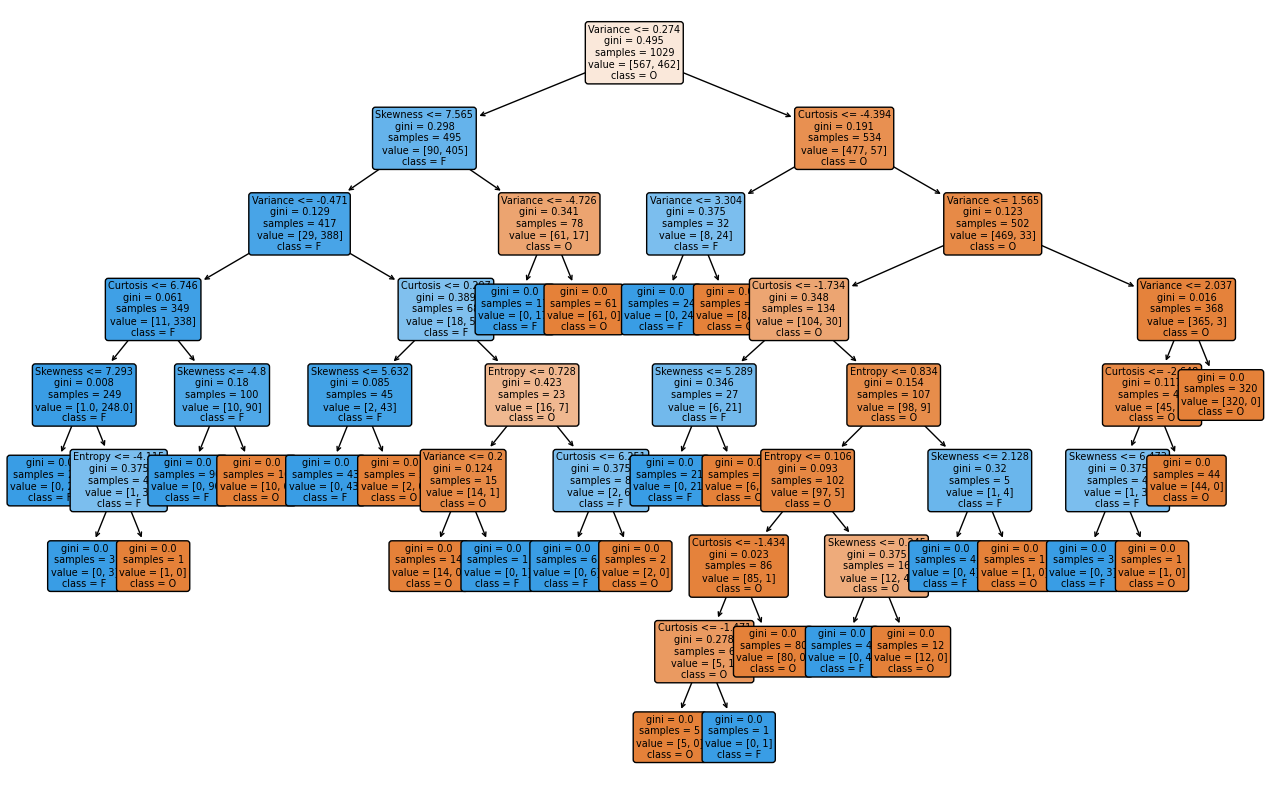

In [46]:
plt.figure(figsize=(16,10))

plot_tree(clf, rounded = True, class_names= ['O', 'F'],
         feature_names= df.columns, fontsize= 7, filled = True);

plt.savefig('tree.png')

In [48]:
clf.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

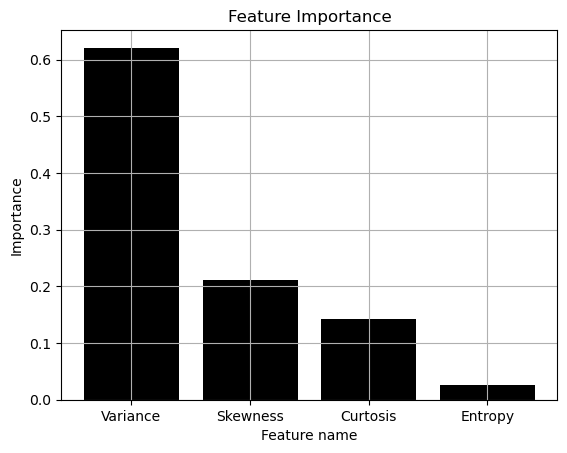

In [50]:
plt.title('Feature Importance')
plt.xlabel('Feature name')
plt.ylabel('Importance')
plt.bar(list(x.columns), clf.feature_importances_, color = 'black');
plt.grid()

In [52]:
# predict

new = [[32.14160, 5.6661, -1.5073, -1.44699]]

In [54]:
clf.predict(new)

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])